In [98]:
import pandas as pd
import re
from string import punctuation
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import os
import gensim


import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import pyLDAvis.gensim_models

import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import pandas as pd
import spacy
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel

In [85]:
news = pd.read_csv('input-data.csv')

In [86]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


In [148]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                2865 non-null   object
 1   news_text_processed  2921 non-null   object
dtypes: object(2)
memory usage: 45.8+ KB


In [151]:
#news = news.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','uid','time','source','time-capture','sc','domain','full-text','sc2','geo','time_parsed','news_text_processed'], axis=1)
news = news.drop(columns=['news_text_processed'], axis=1)


In [152]:
news.head()

,title
0,Czech Prime Minister: The Russian army committ...
1,Heavy shelling in Kharkiv again
2,Artillery command post vehicle was destroyed i...
3,Ukrainian army shotdown Tu-243 UAV with MANPADS
4,"According to the Financial Times, Russia asked..."


In [143]:
news['title']

0       Czech Prime Minister: The Russian army committ...
1                         Heavy shelling in Kharkiv again
2       Artillery command post vehicle was destroyed i...
3         Ukrainian army shotdown Tu-243 UAV with MANPADS
4       According to the Financial Times, Russia asked...
                              ...                        
2916    Ukrainian military captured 2 Russian servicem...
2917    Russia has fired over 250 mostly short-range b...
2918    In Przemys, about fifteen kilometers from the ...
2919    Kharkiv, Kharkivska Oblast(16:27). Red Alert: ...
2920    NATO worries China could support Russia's inva...
Name: title, Length: 2921, dtype: object

In [115]:
def sent_to_words(sentences):
    for sent in sentences:
        
        sent = re.sub('[,\.!?]', '', sent)  # remove emails
        sent = sent.lower()  
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


In [120]:
data = news['title'].values.tolist()
data = str(data)
data_words = list(sent_to_words(data))

data_words

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [107]:
# # Build the bigram and trigram models
# bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data], threshold=100)  
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

In [108]:
# def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
#     texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
#     texts = [bigram_mod[doc] for doc in texts]
#     texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
#     texts_out = []
#     nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     # remove stopwords once more after lemmatization
#     texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
#     return texts_out

# data_ready = process_words(data) 


[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [112]:
# # Create Dictionary
# id2word = corpora.Dictionary(data)

# # Create Corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in data_ready]

# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=4, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=10,
#                                            passes=10,
#                                            alpha='symmetric',
#                                            iterations=100,
#                                            per_word_topics=True)

# pprint(lda_model.print_topics())

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [154]:
type(news['title'][1])

str

In [145]:
temp = []
while n < len(news['title']):
    news['news_text_processed'] = str(news['title'][n])
    n = n+1
    temp.append(news['news_text_processed'])
temp

[]

In [165]:
news['title'] = str(news['title'])

In [168]:

# Remove punctuation
news['news_text_processed'] = news['title'].map(lambda x: re.sub(r'[{}]+'.format(punctuation),' ',x)



SyntaxError: unexpected EOF while parsing (305120170.py, line 3)

In [169]:

# Join the different processed titles together.
long_string = ','.join(list(news['news_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

KeyError: 'news_text_processed'

In [170]:

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


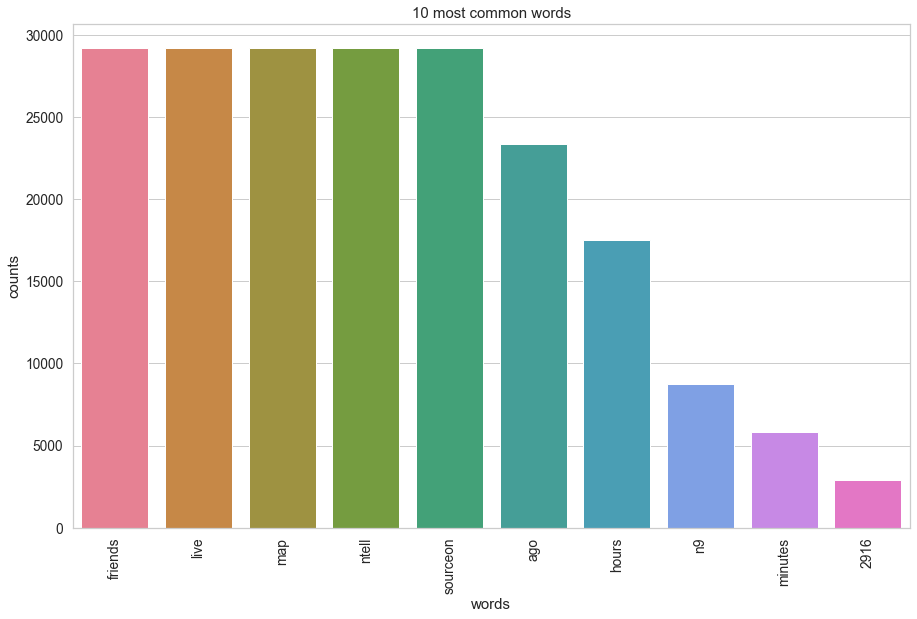

In [55]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(news['news_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [61]:
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2000
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda_model = lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #2:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #3:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #4:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #5:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #6:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #7:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #8:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #9:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #10:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #11:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #12:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #13:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #14:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #15:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #16:
text live 2917 2

/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1207:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1208:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1209:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1210:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1211:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1212:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1213:
live map ntell friends sourceon ago hours n9 minutes hour

Topic #1214:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1215:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1216:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1217:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1218:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1219:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1220:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #1221:
text live 2917 2918 2919 2920 2921 ag ago dtype

Topic #122

In [57]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import os

LDAvis_data_filepath = os.path.join('./ldavis_prepared_' + str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_' + str(number_topics) + '.html')

# 在win10上运行要很久，先中断了，有时间再跑下



/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


KeyboardInterrupt: 

/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swagyangjh/opt/anaconda3/envs/641/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/swagyangjh/op

In [68]:

vis = pyLDAvis.gensim_models.prepare(lda_model, news['news_text_processed'], 'text')
vis

ValueError: not enough values to unpack (expected 2, got 1)